Nilas Myler (153839), Miaomiao Yuan (176835) & Ya-Wen Liang (176692)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

file_path = 'ML Final final/Sales Transaction.csv'

df_raw = pd.read_csv(file_path)



In [3]:
# Display the first few rows and some basic info
print("First 5 rows of the raw dataset:")
print(df_raw.head())
print("\nDataset Information:")
df_raw.info()


First 5 rows of the raw dataset:
  TransactionNo        Date ProductNo                          ProductName  \
0        581482  12-09-2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12-09-2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12-09-2019     23235             Storage Tin Vintage Leaf   
3        581475  12-09-2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12-09-2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         -------

In [4]:
print(" Descriptive Statistics:")
df_raw.describe(include='all')

 Descriptive Statistics:


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
count,536350,536350,536350,536350,536350.000000,536350.000000,536295.000000,536350
unique,23204,305,3768,3768,NaN,NaN,NaN,38
top,573585,12-05-2019,85123A,Cream Hanging Heart T-Light Holder,NaN,NaN,NaN,United Kingdom
freq,1111,5299,2378,2378,NaN,NaN,NaN,485095
mean,NaN,NaN,NaN,NaN,12.662182,9.919347,15227.893178,NaN
std,NaN,NaN,NaN,NaN,8.490450,216.662300,1716.582932,NaN
min,NaN,NaN,NaN,NaN,5.130000,-80995.000000,12004.000000,NaN
25%,NaN,NaN,NaN,NaN,10.990000,1.000000,13807.000000,NaN
50%,NaN,NaN,NaN,NaN,11.940000,3.000000,15152.000000,NaN
75%,NaN,NaN,NaN,NaN,14.090000,10.000000,16729.000000,NaN


In [5]:
# Convert 'Date' column to datetime objects

df_raw['Date'] = pd.to_datetime(df_raw['Date'], dayfirst=True, errors='coerce')


In [6]:
# Ensure 'Price' and 'Quantity' are numeric and handle potential issues
df_raw['Price'] = pd.to_numeric(df_raw['Price'], errors='coerce')
df_raw['Quantity'] = pd.to_numeric(df_raw['Quantity'], errors='coerce')

In [7]:
# Handle missing and negative values

print(f"\nNumber of rows before cleaning NAs and negatives: {len(df_raw)}")
df_raw = df_raw[df_raw['Quantity'] > 0]
df_raw = df_raw[df_raw['Price'] > 0]
print(f"\nNumber of rows after cleaning NAs and negatives: {len(df_raw)}")


Number of rows before cleaning NAs and negatives: 536350

Number of rows after cleaning NAs and negatives: 527765


In [8]:
# Ensure CustomerNo is treated as an string to exclude it from math operations
if pd.api.types.is_numeric_dtype(df_raw['CustomerNo']):
    df_raw['CustomerNo'] = df_raw['CustomerNo'].astype(str)


In [9]:
print("\nUnique values per column (after initial cleaning):")
for col in df_raw.columns:
    print(f"- {col}: {df_raw[col].nunique()} unique values")

print("\nValue counts for 'Country':")
print(df_raw['Country'].value_counts().head(10)) # Display top 10 countries


Unique values per column (after initial cleaning):
- TransactionNo: 19790 unique values
- Date: 127 unique values
- ProductNo: 3753 unique values
- ProductName: 3753 unique values
- Price: 514 unique values
- Quantity: 375 unique values
- CustomerNo: 4719 unique values
- Country: 38 unique values

Value counts for 'Country':
Country
United Kingdom    477771
France             10393
Germany            10240
EIRE                7807
Belgium             2507
Spain               2386
Netherlands         2326
Switzerland         2303
Portugal            1838
Australia           1631
Name: count, dtype: int64


In [10]:
# Time period of the dataset
print(f"\nDataset time period: {df_raw['Date'].min()} to {df_raw['Date'].max()}")
print(f"Duration: {df_raw['Date'].max() - df_raw['Date'].min()}")


Dataset time period: 2018-01-12 00:00:00 to 2019-12-10 00:00:00
Duration: 697 days 00:00:00


Group/aggregate by transaction

In [11]:
# Calculate total value for each product line
df_raw['LineTotal'] = df_raw['Price'] * df_raw['Quantity']

In [12]:
# Define aggregation functions
aggregations = {
    'LineTotal': 'sum',                    # Total value of the transaction
    'Quantity': 'sum',                     # Total number of items in the transaction
    'ProductNo': 'nunique',                # Number of unique products in the transaction
    'Price': ['mean', 'min', 'max'],       # Avg, min, max price of items in transaction
    'CustomerNo': 'first',                 # one customer per transaction
    'Country': 'first',                    # one country per transaction
    'Date': 'first'                        # transaction date (assuming all items in a transaction share the same date)
}

In [13]:
# Group by TransactionNo and apply aggregations
df_transactions = df_raw.groupby('TransactionNo').agg(aggregations)

In [14]:
df_transactions.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_transactions.columns.values]
df_transactions.rename(columns={
    'LineTotal_sum': 'TotalTransactionValue',
    'Quantity_sum': 'TotalItemsInTransaction',
    'ProductNo_nunique': 'UniqueProductsInTransaction',
    'Price_mean': 'AvgItemPriceInTransaction',
    'Price_min': 'MinItemPriceInTransaction',
    'Price_max': 'MaxItemPriceInTransaction',
    'CustomerNo_first': 'CustomerNo',
    'Country_first': 'Country',
    'Date_first': 'TransactionDate'
}, inplace=True)

In [15]:
df_transactions.head(5)

,TotalTransactionValue,TotalItemsInTransaction,UniqueProductsInTransaction,AvgItemPriceInTransaction,MinItemPriceInTransaction,MaxItemPriceInTransaction,CustomerNo,Country,TransactionDate
TransactionNo,,,,,,,,,
536365,552.52,40,7,14.255714,12.86,18.09,17850.0,United Kingdom,2018-01-12
536366,145.80,12,2,12.150000,12.15,12.15,17850.0,United Kingdom,2018-01-12
536367,1136.34,83,12,15.224167,11.94,20.45,13047.0,United Kingdom,2018-01-12
536368,225.54,15,4,15.142500,14.61,15.32,13047.0,United Kingdom,2018-01-12
536369,49.05,3,1,16.350000,16.35,16.35,13047.0,United Kingdom,2018-01-12


In [16]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19790 entries, 536365 to 581587
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TotalTransactionValue        19790 non-null  float64       
 1   TotalItemsInTransaction      19790 non-null  int64         
 2   UniqueProductsInTransaction  19790 non-null  int64         
 3   AvgItemPriceInTransaction    19790 non-null  float64       
 4   MinItemPriceInTransaction    19790 non-null  float64       
 5   MaxItemPriceInTransaction    19790 non-null  float64       
 6   CustomerNo                   19790 non-null  object        
 7   Country                      19790 non-null  object        
 8   TransactionDate              8486 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 1.5+ MB


In [17]:
#reduce floats to 2 in display for easier reading
df_transactions.describe()

,TotalTransactionValue,TotalItemsInTransaction,UniqueProductsInTransaction,AvgItemPriceInTransaction,MinItemPriceInTransaction,MaxItemPriceInTransaction,TransactionDate
count,1.979000e+04,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,8486
mean,3.181707e+03,282.541587,26.116726,13.094252,9.751900,20.699754,2019-05-11 17:37:51.317464320
min,5.460000e+00,1.000000,1.000000,5.460000,5.130000,5.460000,2018-01-12 00:00:00
25%,8.301600e+02,71.000000,6.000000,11.555040,6.130000,14.090000,2019-03-02 00:00:00
50%,1.717000e+03,153.000000,15.000000,12.693705,10.550000,18.400000,2019-06-07 00:00:00
75%,3.312035e+03,298.000000,29.000000,13.991708,11.120000,23.060000,2019-09-06 00:00:00
max,1.002718e+06,80995.000000,1104.000000,660.620000,660.620000,660.620000,2019-12-10 00:00:00
std,1.126961e+04,962.577651,46.912121,13.836818,13.111079,31.785496,NaN


In [18]:
# Set style for plots
sns.set(style="whitegrid")

# Features to visualize
numerical_features = ['TotalTransactionValue', 'TotalItemsInTransaction', 'UniqueProductsInTransaction',
                      'AvgItemPriceInTransaction', 'MinItemPriceInTransaction', 'MaxItemPriceInTransaction']

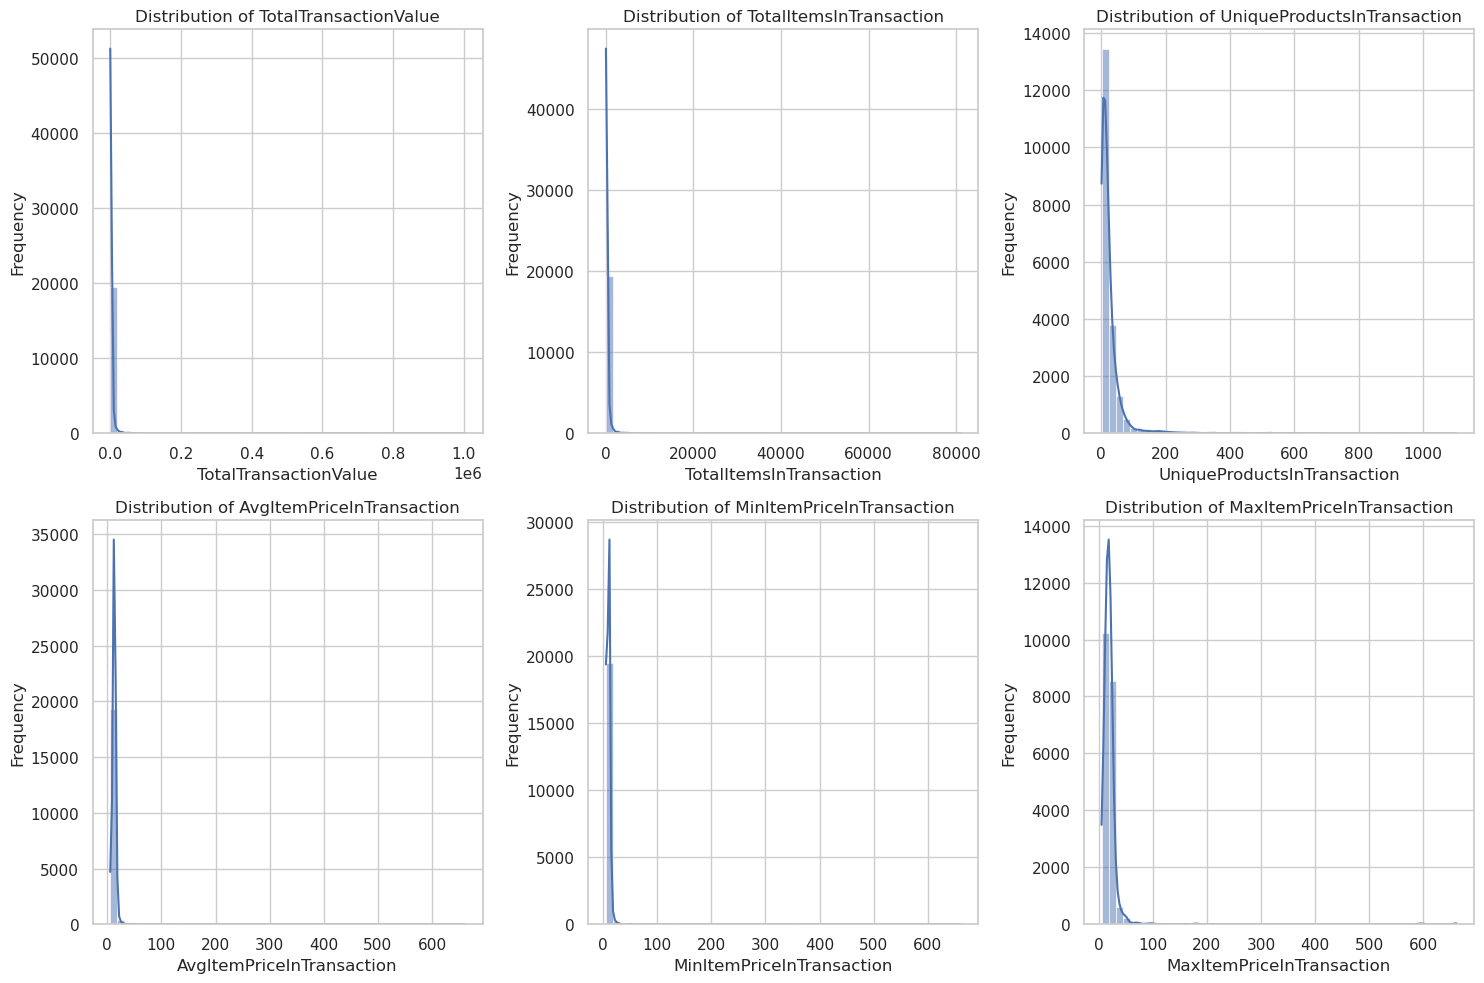

In [19]:
# Create histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_transactions[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

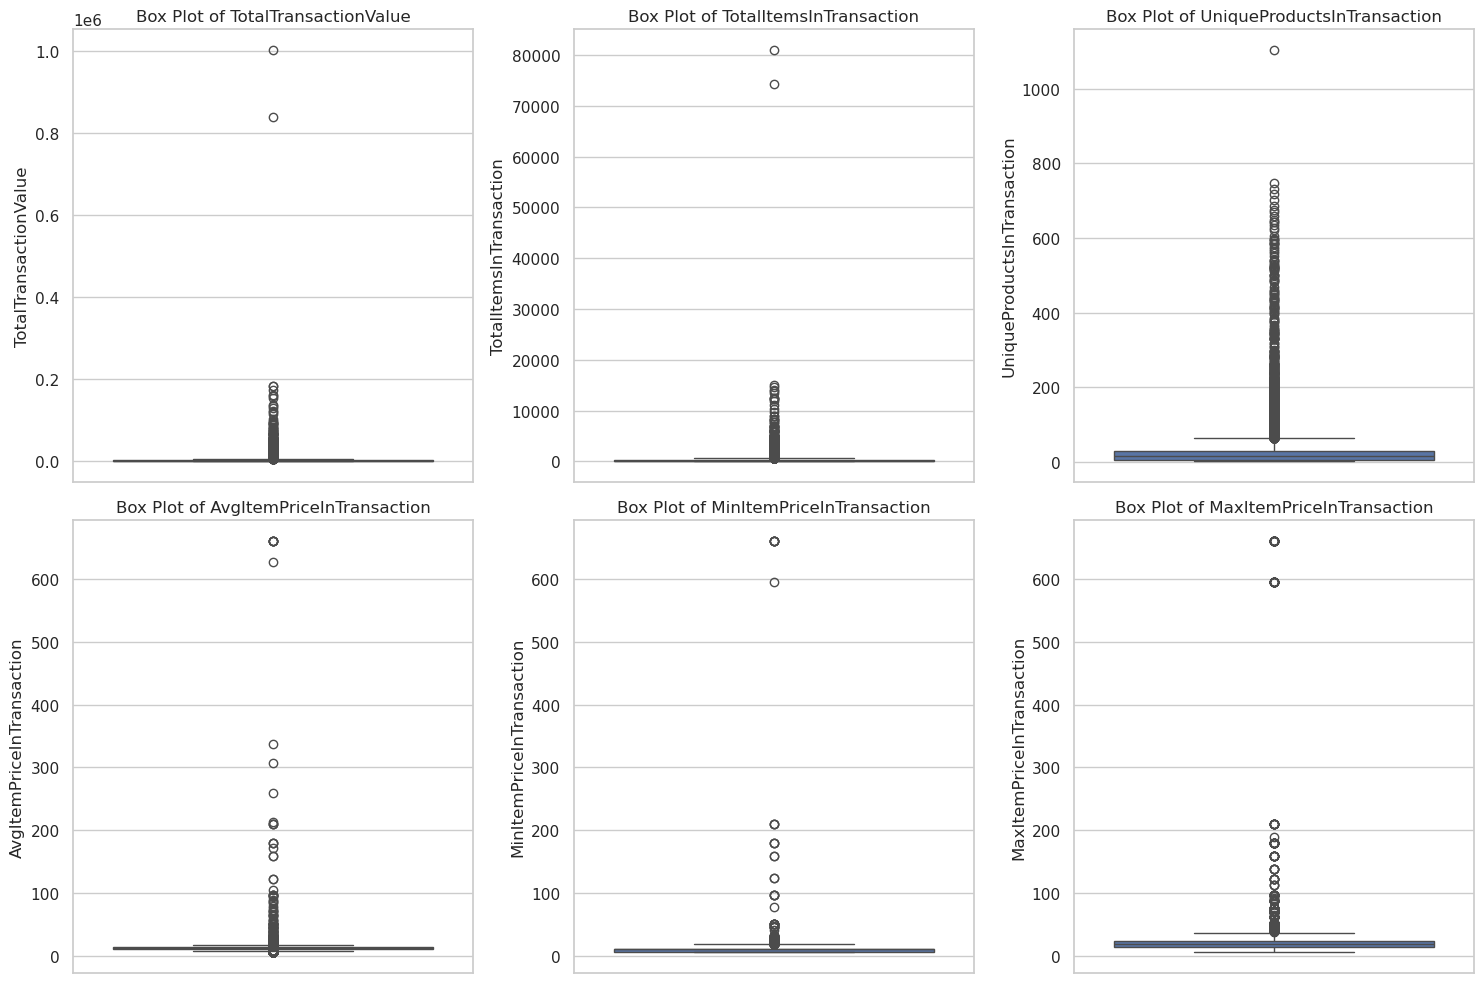

In [20]:
# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_transactions[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [21]:
top_by_items = df_transactions.sort_values(by='TotalItemsInTransaction', ascending=False)
print(top_by_items.head(10)) # Show top 10

               TotalTransactionValue  TotalItemsInTransaction  \
TransactionNo                                                   
581483                    1002718.10                    80995   
541431                     840113.80                    74215   
556917                     172833.48                    15049   
563076                     159953.82                    14730   
574941                     184880.85                    14149   
576365                     184148.76                    13956   
572035                     153882.12                    13392   
567423                     161373.58                    12572   
578841                      77622.60                    12540   
552883                     130999.84                    12266   

               UniqueProductsInTransaction  AvgItemPriceInTransaction  \
TransactionNo                                                           
581483                                   1                  12.380000   


In [22]:
#To check if the same transactions are the cause of extreme negative values (large refund)
bottom_by_value = df_transactions.sort_values(by='TotalItemsInTransaction', ascending=True)
print(bottom_by_value.head(10))

               TotalTransactionValue  TotalItemsInTransaction  \
TransactionNo                                                   
539645                         11.22                        1   
539485                         30.70                        1   
569516                         17.37                        1   
553157                         18.71                        1   
561516                         14.30                        1   
562937                          5.97                        1   
573933                         97.37                        1   
543920                         18.96                        1   
543922                         21.17                        1   
578782                          6.19                        1   

               UniqueProductsInTransaction  AvgItemPriceInTransaction  \
TransactionNo                                                           
539645                                   1                      11.22   


In [23]:
#Specifically remove the 2 very large transactions
#The negative will be removed later
purchase_outlier_ids = ['581483', '541431']
df_transactions = df_transactions.drop(index=purchase_outlier_ids, errors='ignore')



In [24]:
df_transactions.describe()

,TotalTransactionValue,TotalItemsInTransaction,UniqueProductsInTransaction,AvgItemPriceInTransaction,MinItemPriceInTransaction,MaxItemPriceInTransaction,TransactionDate
count,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,8485
mean,3088.899456,274.726501,26.119264,13.094378,9.751688,20.700648,2019-05-11 17:16:56.146140160
min,5.460000,1.000000,1.000000,5.460000,5.130000,5.460000,2018-01-12 00:00:00
25%,830.115000,71.000000,6.000000,11.555121,6.130000,14.090000,2019-03-02 00:00:00
50%,1716.975000,153.000000,15.000000,12.693897,10.550000,18.400000,2019-06-07 00:00:00
75%,3311.247500,298.000000,29.000000,13.991778,11.120000,23.060000,2019-09-06 00:00:00
max,184880.850000,15049.000000,1104.000000,660.620000,660.620000,660.620000,2019-12-10 00:00:00
std,6412.263721,566.669697,46.913812,13.837510,13.111723,31.786978,NaN


In [25]:
# Value counts for Country
country_counts = df_transactions['Country'].value_counts()
print("Value counts for Country:")
print(country_counts)

Value counts for Country:
Country
United Kingdom          17906
Germany                   453
France                    404
EIRE                      277
Belgium                    97
Netherlands                94
Spain                      78
Australia                  62
Switzerland                55
Portugal                   52
Finland                    42
Sweden                     33
Italy                      30
Norway                     28
Channel Islands            23
Denmark                    21
Japan                      20
Unspecified                13
Cyprus                     12
Poland                     11
Austria                    11
Israel                     10
Iceland                     8
USA                         8
Malta                       6
Hong Kong                   6
Canada                      5
Lithuania                   4
Singapore                   4
European Community          3
Bahrain                     2
Czech Republic              2
United

In [26]:
# Percentage distribution
print("\nPercentage distribution for Country:")
print(df_transactions['Country'].value_counts(normalize=True) * 100)


Percentage distribution for Country:
Country
United Kingdom          90.489185
Germany                  2.289266
France                   2.041641
EIRE                     1.399838
Belgium                  0.490196
Netherlands              0.475035
Spain                    0.394178
Australia                0.313321
Switzerland              0.277946
Portugal                 0.262786
Finland                  0.212250
Sweden                   0.166768
Italy                    0.151607
Norway                   0.141500
Channel Islands          0.116232
Denmark                  0.106125
Japan                    0.101071
Unspecified              0.065696
Cyprus                   0.060643
Poland                   0.055589
Austria                  0.055589
Israel                   0.050536
Iceland                  0.040429
USA                      0.040429
Malta                    0.030321
Hong Kong                0.030321
Canada                   0.025268
Lithuania                0.020214
Si

/tmp/ipykernel_504/3979809828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.head(top_n).index, y=country_counts.head(top_n).values, palette="viridis")


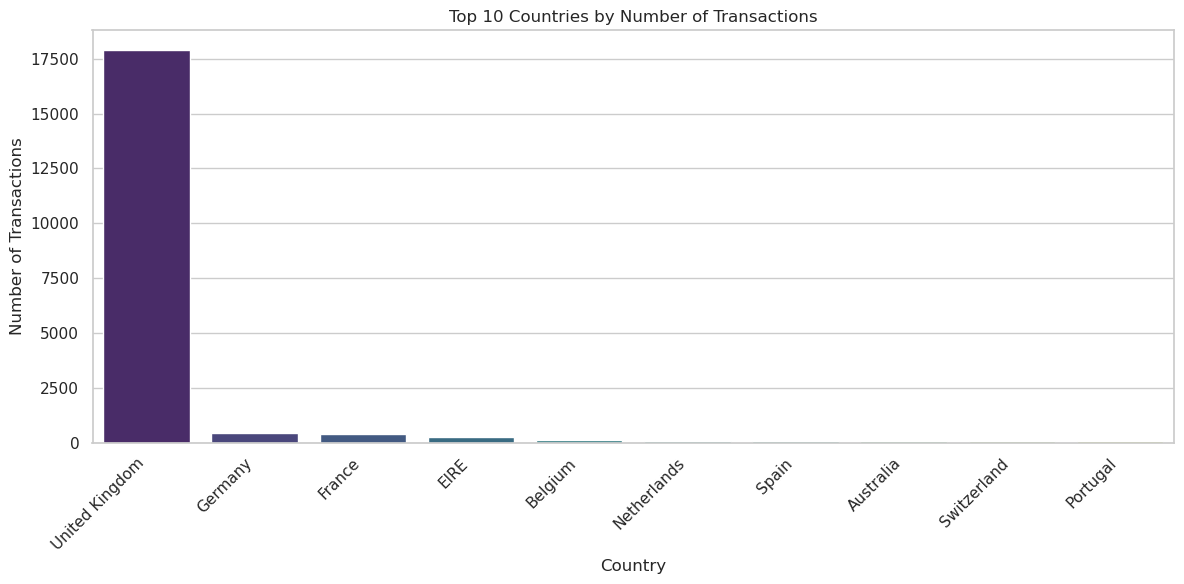


Number of unique countries: 38


In [27]:
# Plotting the top N countries for better visualization
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.head(top_n).index, y=country_counts.head(top_n).values, palette="viridis")
plt.title(f'Top {top_n} Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Number of unique countries
print(f"\nNumber of unique countries: {df_transactions['Country'].nunique()}")

In [28]:
# Ensure TransactionDate is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_transactions['TransactionDate']):
    df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])

In [29]:
# Extract temporal features

df_transactions['TransactionDayOfWeek'] = df_transactions['TransactionDate'].dt.dayofweek # Monday=0, Sunday=6
df_transactions['TransactionDayName'] = df_transactions['TransactionDate'].dt.day_name() # For easier interpretation
df_transactions['TransactionMonth'] = df_transactions['TransactionDate'].dt.month
df_transactions['TransactionYear'] = df_transactions['TransactionDate'].dt.year
df_transactions['TransactionIsWeekend'] = df_transactions['TransactionDayOfWeek'].isin([5, 6]).astype(int) # Saturday=5, Sunday=6

print("\nFirst 5 rows with new temporal features:")
print(df_transactions[['TransactionDate', 'TransactionDayOfWeek', 'TransactionDayName', 'TransactionMonth', 'TransactionIsWeekend']].head())


First 5 rows with new temporal features:
              TransactionDate  TransactionDayOfWeek TransactionDayName  \
TransactionNo                                                            
536365             2018-01-12                   4.0             Friday   
536366             2018-01-12                   4.0             Friday   
536367             2018-01-12                   4.0             Friday   
536368             2018-01-12                   4.0             Friday   
536369             2018-01-12                   4.0             Friday   

               TransactionMonth  TransactionIsWeekend  
TransactionNo                                          
536365                      1.0                     0  
536366                      1.0                     0  
536367                      1.0                     0  
536368                      1.0                     0  
536369                      1.0                     0  


/tmp/ipykernel_504/3407706247.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_transactions, x=col, palette="mako", order = df_transactions[col].value_counts().index if col not in ['TransactionDayName', 'TransactionMonth'] else sorted(df_transactions[col].unique()) if col == 'TransactionMonth' else ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
/tmp/ipykernel_504/3407706247.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_transactions, x=col, palette="mako", order = df_transactions[col].value_counts().index if col not in ['TransactionDayName', 'TransactionMonth'] else sorted(df_transactions[col].unique()) if col == 'TransactionMont

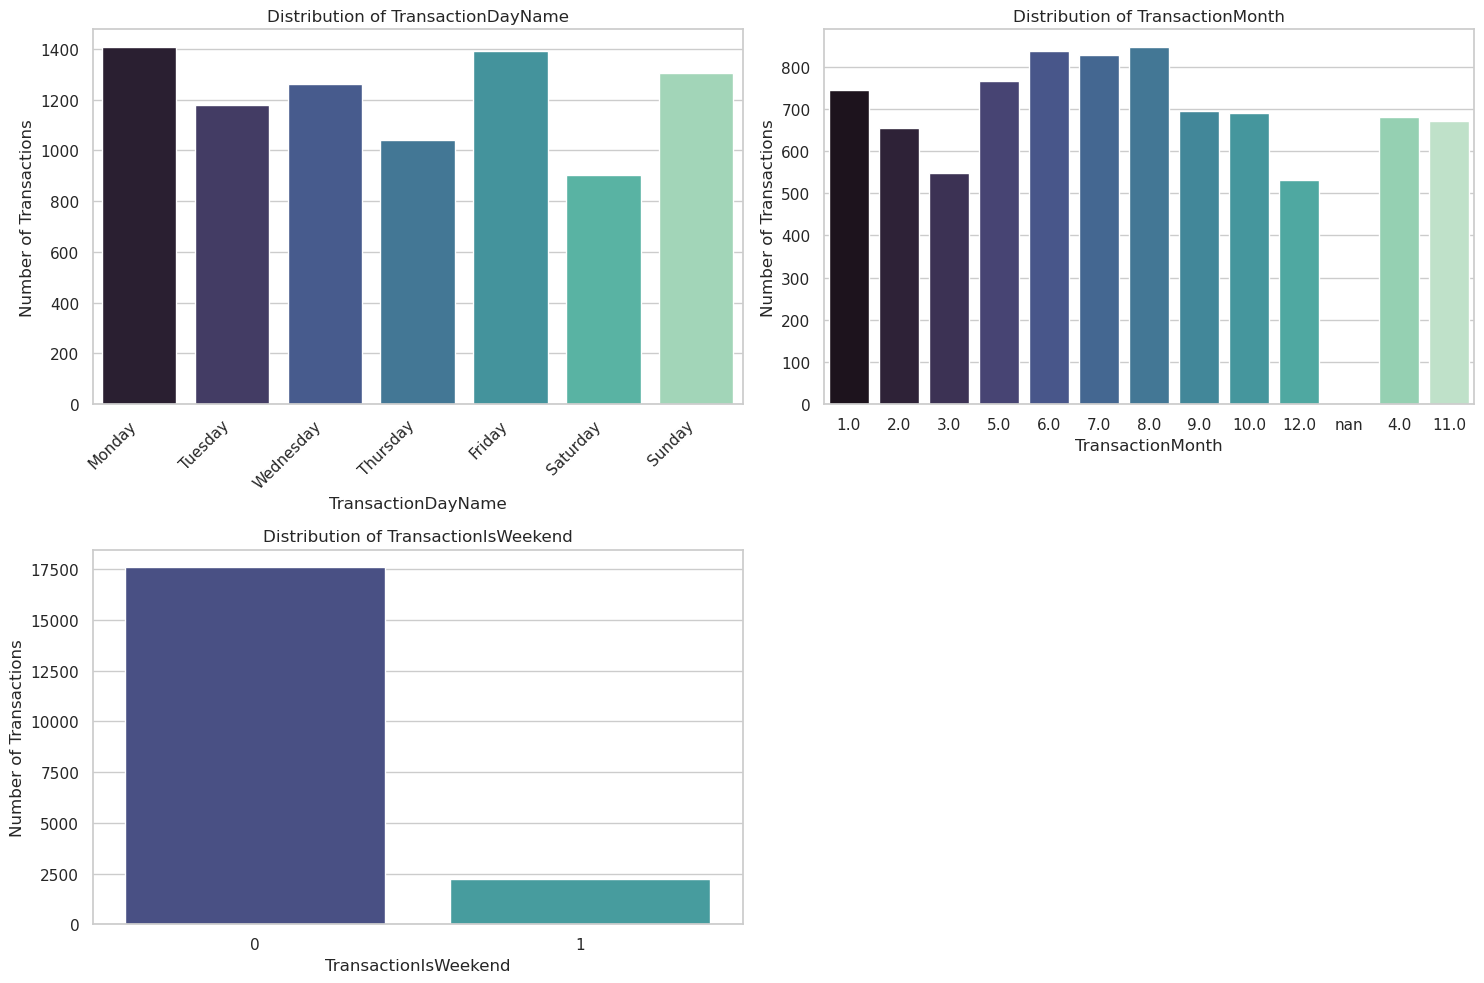

In [30]:
# Explore distributions of time features
temporal_features_to_plot = ['TransactionDayName', 'TransactionMonth', 'TransactionIsWeekend']

plt.figure(figsize=(15, 10))
for i, col in enumerate(temporal_features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df_transactions, x=col, palette="mako", order = df_transactions[col].value_counts().index if col not in ['TransactionDayName', 'TransactionMonth'] else sorted(df_transactions[col].unique()) if col == 'TransactionMonth' else ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Transactions')
    if col == 'TransactionDayName':
        plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19788 entries, 536365 to 581587
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TotalTransactionValue        19788 non-null  float64       
 1   TotalItemsInTransaction      19788 non-null  int64         
 2   UniqueProductsInTransaction  19788 non-null  int64         
 3   AvgItemPriceInTransaction    19788 non-null  float64       
 4   MinItemPriceInTransaction    19788 non-null  float64       
 5   MaxItemPriceInTransaction    19788 non-null  float64       
 6   CustomerNo                   19788 non-null  object        
 7   Country                      19788 non-null  object        
 8   TransactionDate              8485 non-null   datetime64[ns]
 9   TransactionDayOfWeek         8485 non-null   float64       
 10  TransactionDayName           8485 non-null   object        
 11  TransactionMonth             8485 non-nu

Correlation analysis

In [32]:
# Select numerical features for correlation analysis
# create a list of features
features_for_correlation = [
    'TotalTransactionValue',
    'TotalItemsInTransaction',
    'UniqueProductsInTransaction',
    'AvgItemPriceInTransaction',
    'MinItemPriceInTransaction',
    'MaxItemPriceInTransaction',
    #might not be linear correlated
    'TransactionDayOfWeek',
    'TransactionMonth',
    'TransactionIsWeekend'

]

In [33]:
# Create a DataFrame with only the selected features for correlation
correlation_df = df_transactions[features_for_correlation].copy()

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

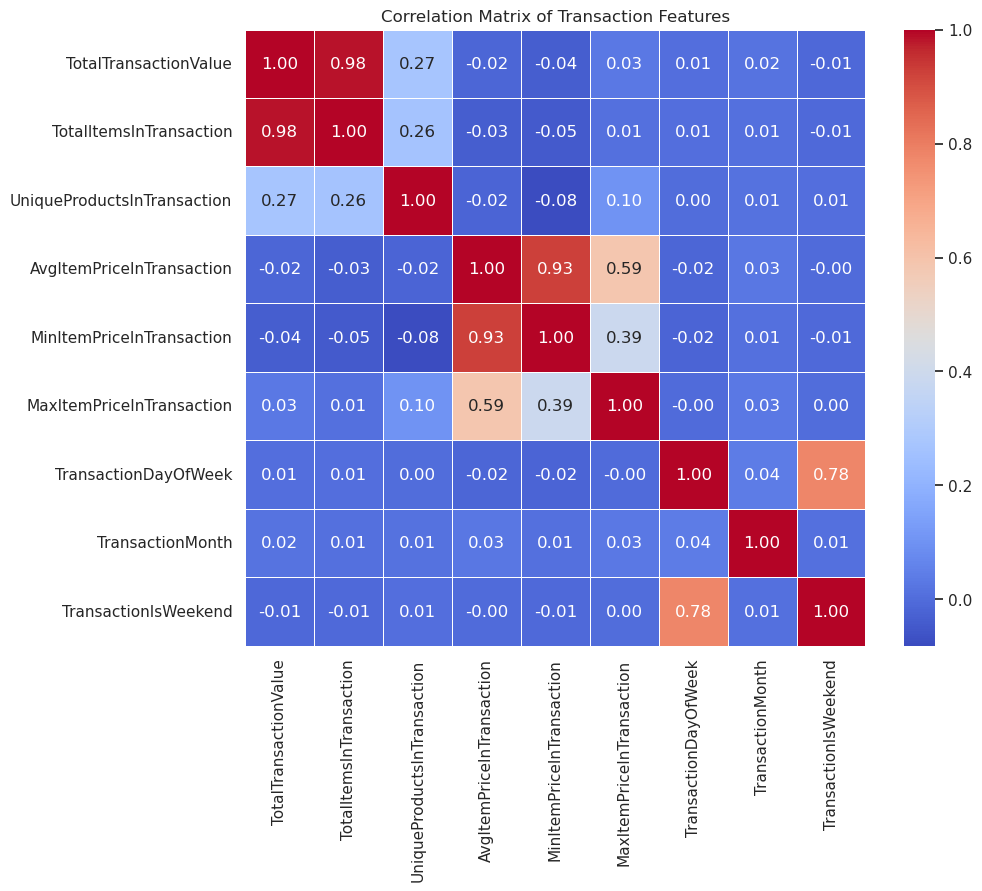

In [34]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Transaction Features')
plt.show()



Create final dataset


In [35]:
df_model = df_transactions.copy()

In [36]:
# Handle 'Country'
# Create 'Is_UK' feature and then drop 'Country' for clustering input
df_model['Is_UK'] = np.where(df_model['Country'] == 'United Kingdom', 1, 0)


In [37]:
# Select final numerical features for clustering
numerical_features_for_scaling = [
    'TotalTransactionValue',
    'TotalItemsInTransaction',
    'UniqueProductsInTransaction',
    'AvgItemPriceInTransaction',
    'MinItemPriceInTransaction',
    'MaxItemPriceInTransaction'
]

In [38]:
# Verify all selected numerical features exist
existing_numerical_features = [col for col in numerical_features_for_scaling if col in df_model.columns]
if len(existing_numerical_features) != len(numerical_features_for_scaling):
    print("Warning: Some numerical features listed for modeling are not in the DataFrame.")
    print(f"Using existing features: {existing_numerical_features}")
numerical_features_for_scaling = existing_numerical_features

In [39]:
# Select categorical features for one-hot encoding
categorical_features_to_encode = [ 'TransactionDayOfWeek' ]
# 'Is_UK' and 'TransactionIsWeekend' are already binary (0/1) and don't need OHE.

# Add already binary features to a list
binary_features = [ 'TransactionIsWeekend']

In [40]:
df_model_encoded = pd.get_dummies(df_model,
                                  columns=categorical_features_to_encode,
                                  prefix=categorical_features_to_encode,
                                  drop_first=False)


print(f"Shape after OHE: {df_model_encoded.shape}")


Shape after OHE: (19788, 21)


In [41]:
ohe_cols = [col for col in df_model_encoded.columns if any(cat_feat + "_" in col for cat_feat in categorical_features_to_encode)]

In [42]:
final_feature_columns_for_model = numerical_features_for_scaling +  ohe_cols # binary features excluded


In [43]:
# Create the final DataFrame for modeling input (X)
final_feature_columns_for_model = [col for col in final_feature_columns_for_model if col in df_model_encoded.columns]
X = df_model_encoded[final_feature_columns_for_model].copy()

In [44]:
X

,TotalTransactionValue,TotalItemsInTransaction,UniqueProductsInTransaction,AvgItemPriceInTransaction,MinItemPriceInTransaction,MaxItemPriceInTransaction,TransactionDayOfWeek_0.0,TransactionDayOfWeek_1.0,TransactionDayOfWeek_2.0,TransactionDayOfWeek_3.0,TransactionDayOfWeek_4.0,TransactionDayOfWeek_5.0,TransactionDayOfWeek_6.0
TransactionNo,,,,,,,,,,,,,
536365,552.52,40,7,14.255714,12.86,18.09,False,False,False,False,True,False,False
536366,145.80,12,2,12.150000,12.15,12.15,False,False,False,False,True,False,False
536367,1136.34,83,12,15.224167,11.94,20.45,False,False,False,False,True,False,False
536368,225.54,15,4,15.142500,14.61,15.32,False,False,False,False,True,False,False
536369,49.05,3,1,16.350000,16.35,16.35,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,550.24,76,2,7.240000,7.24,7.24,False,False,False,True,False,False,False
581584,868.80,120,2,7.240000,7.24,7.24,False,False,False,True,False,False,False
581585,1863.17,278,21,6.749524,6.19,7.24,False,False,False,True,False,False,False


In [47]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them
X[numerical_features_for_scaling] = scaler.fit_transform(X[numerical_features_for_scaling])

print("\nFirst 5 rows of X after scaling numerical features:")
print(X.head())


First 5 rows of X after scaling numerical features:
               TotalTransactionValue  TotalItemsInTransaction  \
TransactionNo                                                   
536365                     -0.395561                -0.414231   
536366                     -0.458991                -0.463644   
536367                     -0.304512                -0.338348   
536368                     -0.446556                -0.458350   
536369                     -0.474080                -0.479527   

               UniqueProductsInTransaction  AvgItemPriceInTransaction  \
TransactionNo                                                           
536365                           -0.407550                   0.083929   
536366                           -0.514132                  -0.068249   
536367                           -0.300969                   0.153918   
536368                           -0.471499                   0.148016   
536369                           -0.535448           

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19788 entries, 536365 to 581587
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalTransactionValue        19788 non-null  float64
 1   TotalItemsInTransaction      19788 non-null  float64
 2   UniqueProductsInTransaction  19788 non-null  float64
 3   AvgItemPriceInTransaction    19788 non-null  float64
 4   MinItemPriceInTransaction    19788 non-null  float64
 5   MaxItemPriceInTransaction    19788 non-null  float64
 6   TransactionDayOfWeek_0.0     19788 non-null  bool   
 7   TransactionDayOfWeek_1.0     19788 non-null  bool   
 8   TransactionDayOfWeek_2.0     19788 non-null  bool   
 9   TransactionDayOfWeek_3.0     19788 non-null  bool   
 10  TransactionDayOfWeek_4.0     19788 non-null  bool   
 11  TransactionDayOfWeek_5.0     19788 non-null  bool   
 12  TransactionDayOfWeek_6.0     19788 non-null  bool   
dtypes: bool(7), flo

In [49]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Baseline models

In [50]:
# Determine a range of k values to try
k_values_to_try = range(2, 11) # from 2 to 10 clusters
silhouette_scores_kmeans = []
inertia_values = []
training_times_kmeans = []

In [51]:
for k in k_values_to_try:
    print(f"\nRunning K-Means with k={k}...")
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)

    start_time = time.time()
    kmeans.fit(X)
    end_time = time.time()

    training_time_seconds = end_time - start_time
    training_times_kmeans.append(training_time_seconds)

    # Get cluster labels
    labels_kmeans_baseline = kmeans.labels_

    # Calculate inertia (WCSS)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate Silhouette Score

    if k > 1 and k < X.shape[0]:
        score = silhouette_score(X, labels_kmeans_baseline)
        silhouette_scores_kmeans.append(score)
        print(f"  Silhouette Score: {score:.4f}")
    else:
        silhouette_scores_kmeans.append(np.nan)

    print(f"  Inertia (WCSS): {inertia:.2f}")
    print(f"  Training Time: {training_time_seconds:.4f} seconds")
    print(f"  Number of iterations to converge: {kmeans.n_iter_}")


Running K-Means with k=2...
  Silhouette Score: 0.8520
  Inertia (WCSS): 104879.31
  Training Time: 0.3420 seconds
  Number of iterations to converge: 3

Running K-Means with k=3...
  Silhouette Score: 0.9144
  Inertia (WCSS): 76876.05
  Training Time: 0.1630 seconds
  Number of iterations to converge: 2

Running K-Means with k=4...
  Silhouette Score: 0.8382
  Inertia (WCSS): 53916.69
  Training Time: 0.1787 seconds
  Number of iterations to converge: 16

Running K-Means with k=5...
  Silhouette Score: 0.7088
  Inertia (WCSS): 42584.24
  Training Time: 0.2010 seconds
  Number of iterations to converge: 26

Running K-Means with k=6...
  Silhouette Score: 0.5251
  Inertia (WCSS): 35690.33
  Training Time: 0.2282 seconds
  Number of iterations to converge: 25

Running K-Means with k=7...
  Silhouette Score: 0.4271
  Inertia (WCSS): 30640.68
  Training Time: 0.2456 seconds
  Number of iterations to converge: 30

Running K-Means with k=8...
  Silhouette Score: 0.4320
  Inertia (WCSS): 273

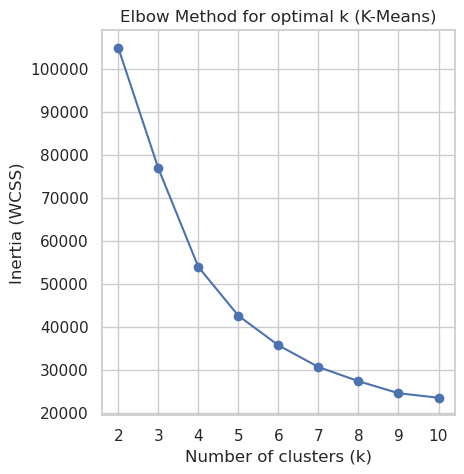

In [52]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values_to_try, inertia_values, marker='o')
plt.title('Elbow Method for optimal k (K-Means)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(list(k_values_to_try))
plt.grid(True)

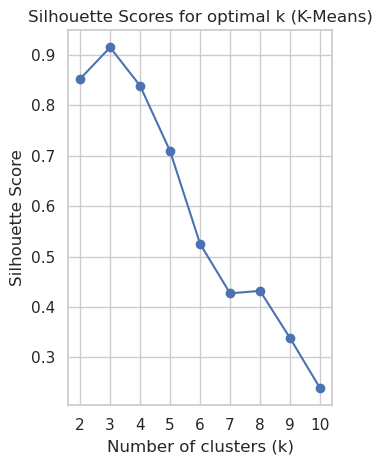

In [53]:
# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values_to_try, silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Scores for optimal k (K-Means)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(list(k_values_to_try))
plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:
print("K-Means Training Times (seconds):")
for k_val, t_time in zip(k_values_to_try, training_times_kmeans):
    print(f"k={k_val}: {t_time:.4f} s")

K-Means Training Times (seconds):
k=2: 0.3420 s
k=3: 0.1630 s
k=4: 0.1787 s
k=5: 0.2010 s
k=6: 0.2282 s
k=7: 0.2456 s
k=8: 0.2012 s
k=9: 0.1942 s
k=10: 0.2214 s


# PCA + Kmeans (baseline)

In [55]:
from sklearn.decomposition import PCA
def run_pca_kmeans(X, n_clusters):
    # Perform PCA to reduce dimensions to 5
    pca = PCA(n_components=5)
    X_pca = pca.fit_transform(X)

    # Start timing the KMeans fitting process
    start_time = time.time()

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)

    # Get cluster labels
    labels_kmeans = kmeans.labels_

    # Calculate silhouette score
    silhouette = silhouette_score(X_pca, labels_kmeans)

    # Compute training time
    training_time = time.time() - start_time

    return silhouette, training_time, X_pca, labels_kmeans

# Running PCA + KMeans Baseline
n_clusters = 3  # Specify the number of clusters for KMeans
silhouette_pca_kmeans, time_pca_kmeans, X_pca, labels_kmeans = run_pca_kmeans(X, n_clusters)

# Print results
print(f"PCA + KMeans Baseline - Silhouette Score: {silhouette_pca_kmeans:.4f}, Training Time: {time_pca_kmeans:.4f} seconds")


PCA + KMeans Baseline - Silhouette Score: 0.8652, Training Time: 5.2635 seconds


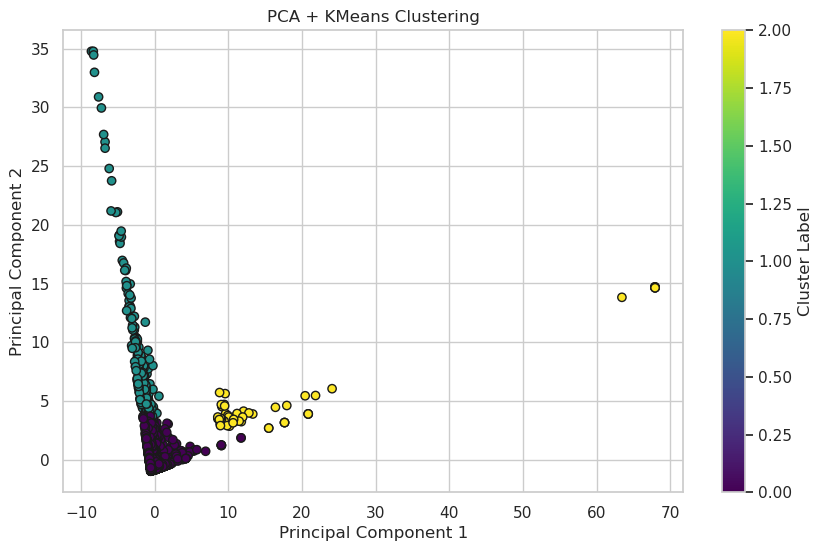

In [56]:
# Plotting the PCA results with KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title('PCA + KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# Autoencoder + Kmeans (baseline)




In [59]:
#Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # for validations


In [60]:
n_inputs = X.values.shape[1]
print(f"Number of input features for Autoencoder: {n_inputs}")

Number of input features for Autoencoder: 13


In [61]:
def create_autoencoder(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(input_shape[0], activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [62]:
def run_autoencoder_kmeans(X, n_clusters):
    autoencoder = create_autoencoder(X.shape[1:])

    # Fit the Autoencoder
    start_time = time.time()
    history = autoencoder.fit(X, X, epochs=50, batch_size=32, verbose=0)
    training_time = time.time() - start_time

    # Get the reconstruction loss
    reconstruction_loss = history.history['loss'][-1]  # Get the last epoch loss

    # Encode the data
    X_encoded = autoencoder.predict(X)

    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_encoded)
    labels_autoencoder_kmeans = kmeans.labels_

    # Calculate silhouette score
    silhouette = silhouette_score(X_encoded, labels_autoencoder_kmeans)

    return reconstruction_loss, silhouette, training_time, labels_autoencoder_kmeans

In [63]:
# Running Autoencoder + KMeans Baseline
reconstruction_loss, silhouette_autoencoder_kmeans, time_autoencoder_kmeans, labels_autoencoder_kmeans = run_autoencoder_kmeans(X, n_clusters=3)

619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step


In [64]:
# Model Evaluation
print(f"Autoencoder + KMeans Baseline Evaluation:")
print(f" - Reconstruction Loss: {reconstruction_loss:.4f}")
print(f" - Silhouette Score: {silhouette_autoencoder_kmeans:.4f}")
print(f" - Training Time: {time_autoencoder_kmeans:.4f} seconds")

Autoencoder + KMeans Baseline Evaluation:
 - Reconstruction Loss: 0.3746
 - Silhouette Score: 0.3489
 - Training Time: 58.9804 seconds


#Finetuned model compositions

## PCA + Kmeans (Finetuned)

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster    import KMeans
from sklearn.metrics    import silhouette_score

In [66]:
#Grid-search PCA + K-Means
results = []
for n_comp in range(2, min(X.shape[1], 15)+1):
    pca   = PCA(n_components=n_comp, random_state=42)
    X_pca = pca.fit_transform(X)
    for K in range(2, 11):
        km     = KMeans(n_clusters=K, random_state=42)
        labels = km.fit_predict(X_pca)
        score  = silhouette_score(X_pca, labels)
        results.append((n_comp, K, score))

grid = pd.DataFrame(results, columns=['n_components','K','silhouette'])
best = grid.loc[grid['silhouette'].idxmax()]
n_best, K_best, best_score = best

print(f"Best: {int(n_best)} PCA comps + K={int(K_best)} → silhouette={best_score:.4f}")


Best: 7 PCA comps + K=3 → silhouette=0.9211


In [67]:
start_time = time.time()

pca_best = PCA(n_components=int(n_best), random_state=42)
X_pca_best = pca_best.fit_transform(X)

km_best = KMeans(n_clusters=int(K_best), random_state=42)
labels_best = km_best.fit_predict(X_pca_best)   

elapsed = time.time() - start_time

print(f"Best: {int(n_best)} PCA comps + K={int(K_best)} → silhouette={best_score:.4f} → training time={elapsed:.4f}s")


Best: 7 PCA comps + K=3 → silhouette=0.9211 → training time=0.2013s


In [68]:
pca_final    = PCA(n_components=int(n_best), random_state=42)
X_pca_final  = pca_final.fit_transform(X)
km_final      = KMeans(n_clusters=int(K_best), random_state=42)
cluster_labels_pca_ft = km_final.fit_predict(X_pca_final)

## Autoencoder + Kmeans (Finetuned)

In [69]:
#Hyperparameters for shallow autoencoder
#Convert from dataframe to numpy array
X_np = X
n_inputs = X_np.shape[1]
coding_size = 6

lr = 0.0005
act_func = "selu"
init= "lecun_normal"
opt = "nadam"
dense1 = 64
btch_size = 64
epochs_num = 50


In [70]:
#encoder
encoder = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[n_inputs]),
    keras.layers.Dense(dense1, activation=act_func, kernel_initializer=init),
    keras.layers.Dense(coding_size, activation=None) #bottleneck layer
], name="encoder")

#decoder
decoder = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[coding_size]),
    keras.layers.Dense(dense1, activation=act_func, kernel_initializer=init),
    keras.layers.Dense(n_inputs, activation=None)
], name="decoder")

#autoencoder
shallow_autoencoder = keras.models.Sequential([encoder, decoder], name="Shallow Autoencoder")

shallow_autoencoder.summary()

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "Shallow Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 6)              │         1,286 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 13)             │         1,293 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,579 (10.07 KB)

 Trainable params: 2,579 (10.07 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Compile the autoencoder
from tensorflow.keras.optimizers import Nadam
# Create the optimizer
opt = Nadam(learning_rate=lr)
# Compile only with optimizer and loss
shallow_autoencoder.compile(optimizer=opt, loss='mse')


In [74]:
#allocate 10% for validation set to check for overfitting when reconstructing data
X_train_ae, X_val_ae = train_test_split(X_np, test_size=0.1, random_state=42)

print(f"Training autoencoder on {X_train_ae.shape[0]} samples, validating on {X_val_ae.shape[0]} samples.")

start_time_ae = time.time()
history_ae =shallow_autoencoder.fit(X_train_ae, X_train_ae,
                           epochs=epochs_num,
                           batch_size=btch_size,
                           validation_data=(X_val_ae, X_val_ae),
                           callbacks=[
                               keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
                           ])
end_time_ae = time.time()
training_time_ae = end_time_ae - start_time_ae
print(f"Shallow Autoencoder training time: {training_time_ae:.2f} seconds")

Training autoencoder on 17809 samples, validating on 1979 samples.
Epoch 1/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5362 - val_loss: 0.1861
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1267 - val_loss: 0.0667
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0496 - val_loss: 0.0319
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0324 - val_loss: 0.0274
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0320 - val_loss: 0.0250
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0269 - val_loss: 0.0233
Epoch 7/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0245 - val_loss: 0.0218
Epoch 8/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0226 - val_loss: 0.0201
Epoch 9/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0208 - val_loss: 0.0198
Epoch 10/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0223 - val_loss: 0.0193
Epoch 11/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0204 - va

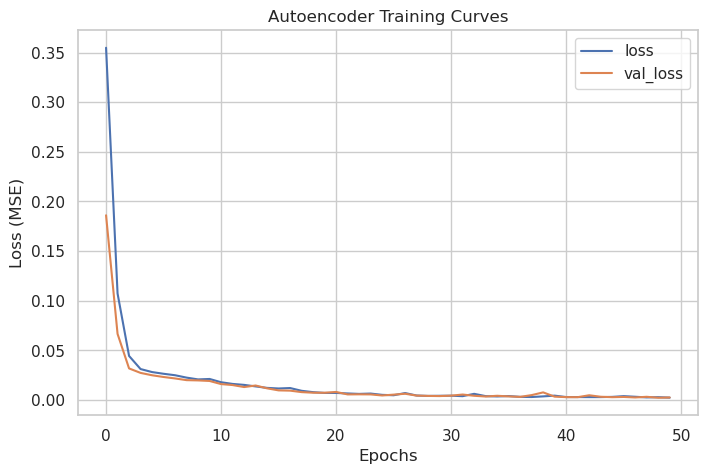

In [75]:
# Plot learning curves for the autoencoder
pd.DataFrame(history_ae.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Autoencoder Training Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.show()

In [76]:
#transform in to new low dimension dataset
X_encoded = encoder.predict(X_np)
print(X_np.shape) # training data
print(X_encoded.shape) # encoded data

619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step
(19788, 13)
(19788, 6)


In [77]:
# Use encoded data in Kmeans
k_values_to_try_ae = range(2, 15)
silhouette_scores_kmeans_ae = []
inertia_values_ae = []
training_times_kmeans_ae = []

for k_ae in k_values_to_try_ae:
    print(f"\nRunning K-Means on encoded data with k={k_ae}...")
    kmeans_ae = KMeans(n_clusters=k_ae, init='k-means++', n_init='auto', random_state=42)

    start_time_km_ae = time.time()
    labels_kmeans_ae = kmeans_ae.fit_predict(X_encoded)
    end_time_km_ae = time.time()

    training_time_seconds_km_ae = end_time_km_ae - start_time_km_ae
    training_times_kmeans_ae.append(training_time_seconds_km_ae)

    inertia_ae = kmeans_ae.inertia_
    inertia_values_ae.append(inertia_ae)

    if k_ae > 1 and k_ae < X_encoded.shape[0]:
        score_ae = silhouette_score(X_encoded, labels_kmeans_ae)
        silhouette_scores_kmeans_ae.append(score_ae)
        print(f"  Silhouette Score: {score_ae:.4f}")
    else:
        silhouette_scores_kmeans_ae.append(np.nan)

    print(f"  Inertia (WCSS): {inertia_ae:.2f}")
    print(f"  K-Means training time: {training_time_seconds_km_ae:.4f} seconds")
    print(f"  Number of iterations to converge: {kmeans_ae.n_iter_}")


Running K-Means on encoded data with k=2...
  Silhouette Score: 0.4947
  Inertia (WCSS): 68085.62
  K-Means training time: 0.0252 seconds
  Number of iterations to converge: 7

Running K-Means on encoded data with k=3...
  Silhouette Score: 0.5112
  Inertia (WCSS): 62211.29
  K-Means training time: 0.0276 seconds
  Number of iterations to converge: 4

Running K-Means on encoded data with k=4...
  Silhouette Score: 0.5611
  Inertia (WCSS): 49987.04
  K-Means training time: 0.0335 seconds
  Number of iterations to converge: 5

Running K-Means on encoded data with k=5...
  Silhouette Score: 0.5612
  Inertia (WCSS): 35125.41
  K-Means training time: 0.0260 seconds
  Number of iterations to converge: 5

Running K-Means on encoded data with k=6...
  Silhouette Score: 0.5659
  Inertia (WCSS): 25174.73
  K-Means training time: 0.0336 seconds
  Number of iterations to converge: 5

Running K-Means on encoded data with k=7...
  Silhouette Score: 0.5692
  Inertia (WCSS): 20948.45
  K-Means traini

In [78]:
best_k_ae = k_values_to_try_ae[np.argmax(silhouette_scores_kmeans_ae)]
best_silhouette_ae = np.nanmax(silhouette_scores_kmeans_ae)

In [79]:
final_kmeans_ae = KMeans(n_clusters=best_k_ae, init='k-means++', n_init='auto', random_state=42)
labels_ae_shallow = final_kmeans_ae.fit_predict(X_encoded)

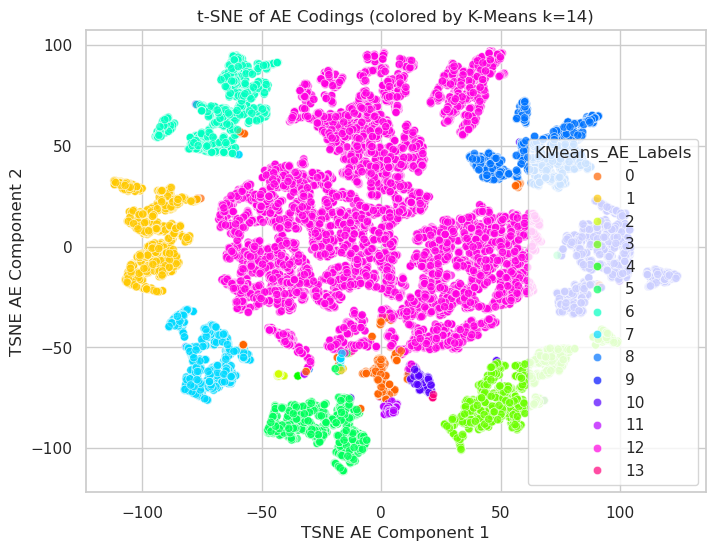

In [80]:
#TSNE to visualize clusters
from sklearn.manifold import TSNE
tsne_ae = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000) #

X_tsne_ae = tsne_ae.fit_transform(X_encoded)

tsne_ae_df = pd.DataFrame(data=X_tsne_ae, columns=['TSNE1_AE', 'TSNE2_AE'])
tsne_ae_df['KMeans_AE_Labels'] = labels_ae_shallow

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="TSNE1_AE", y="TSNE2_AE",
    hue="KMeans_AE_Labels",
   palette=sns.color_palette("hsv", len(set(labels_ae_shallow))),
  data=tsne_ae_df,
  legend="full",
  alpha=0.7
)
plt.title(f't-SNE of AE Codings (colored by K-Means k={best_k_ae})')
plt.xlabel('TSNE AE Component 1')
plt.ylabel('TSNE AE Component 2')
plt.grid(True)
plt.show()



### Automated finetuning with KerasTuner*

In [83]:
import keras_tuner as kt

def build_ae_hypermodel(hp):
  n_inputs = 13 #diemensions of input data
  coding_size = hp.Int('coding_size', min_value=4, max_value=10, step=2)
  units_l1 = hp.Int('units_l1', min_value=32, max_value=128, step=32)
  units_l2 = hp.Int('units_l2', min_value=16, max_value=64, step=16)
  activation = hp.Choice('activation', ['selu', 'relu'])
  lr = hp.Choice('learning_rate', [0.001, 0.0005])

  encoder = keras.models.Sequential([
      keras.layers.InputLayer(shape=[n_inputs]),
      keras.layers.Dense(units_l1, activation=activation, kernel_initializer='lecun_normal' if activation=='selu' else 'he_normal'),
      keras.layers.Dense(units_l2, activation=activation, kernel_initializer='lecun_normal' if activation=='selu' else 'he_normal'), # If deeper
      keras.layers.Dense(coding_size, activation=None)
   ])

  decoder = keras.models.Sequential([
      keras.layers.InputLayer(shape=[coding_size]),
      keras.layers.Dense(units_l2, activation=activation, kernel_initializer='lecun_normal' if activation=='selu' else 'he_normal'), # If deeper
      keras.layers.Dense(units_l1, activation=activation, kernel_initializer='lecun_normal' if activation=='selu' else 'he_normal'),
      keras.layers.Dense(n_inputs, activation=None)
  ])
  autoencoder = keras.models.Sequential([encoder, decoder])
  autoencoder.compile(loss="mse", optimizer=keras.optimizers.Nadam(learning_rate=lr))
  return autoencoder

tuner = kt.RandomSearch(
    build_ae_hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_ae_tuning',
    project_name='transaction_ae'
)
tuner.search(X_train_ae, X_train_ae, epochs=50, validation_data=(X_val_ae, X_val_ae),
              callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_ae_model = tuner.get_best_models(num_models=1)[0]
print(f"Best AE HPs for reconstruction: {best_hps.values}")


Trial 10 Complete [00h 01m 10s]
val_loss: 0.005672417115420103

Best val_loss So Far: 0.001292040920816362
Total elapsed time: 00h 10m 05s
Best AE HPs for reconstruction: {'coding_size': 10, 'units_l1': 32, 'units_l2': 48, 'activation': 'selu', 'learning_rate': 0.001}


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 27 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Deep Autoencoder + Kmeans

In [84]:
X_np = X # Reset numpy array

#Hyperparameters
n_inputs = X_np.shape[1]
coding_size = 6 # coding for bottleneck layer

lr = 0.0005
act_func = "relu"
init= "he_normal"
reg = keras.regularizers.l1(1e-5)


dense1 = 128
dense2 = 64
dense3 = 32
btch_size = 64
epochs_num = 100

In [85]:
#encoder
encoder = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[n_inputs]),
    keras.layers.Dense(dense1, activation=act_func, kernel_initializer=init, kernel_regularizer=reg),
    keras.layers.Dense(dense2, activation=act_func, kernel_initializer=init,kernel_regularizer=reg ),
    keras.layers.Dense(dense3, activation=act_func, kernel_initializer=init, kernel_regularizer=reg),
    keras.layers.Dense(coding_size, activation=None) #bottleneck layer
], name="encoder")

#decoder
decoder = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[coding_size]),
    keras.layers.Dense(dense3, activation=act_func, kernel_initializer=init, kernel_regularizer=reg),
    keras.layers.Dense(dense2, activation=act_func, kernel_initializer=init, kernel_regularizer=reg ),
    keras.layers.Dense(dense1, activation=act_func, kernel_initializer=init, kernel_regularizer=reg),
    keras.layers.Dense(n_inputs, activation=None)
], name="decoder")

#autoencoder
deep_autoencoder = keras.models.Sequential([encoder, decoder], name="Deep Autoencoder")

deep_autoencoder.summary()

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "Deep Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 6)              │        12,326 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 13)             │        12,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,659 (96.32 KB)

 Trainable params: 24,659 (96.32 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Compile
from tensorflow.keras.optimizers import Nadam
# Create the optimizer
opt = Nadam(learning_rate=lr)
# Compile only with optimizer and loss
deep_autoencoder.compile(optimizer=opt, loss='mse')

In [89]:
#allocate 10% for validation set to check for overfitting when reconstructing data

X_train_ae, X_val_ae = train_test_split(X_np, test_size=0.1, random_state=42)

print(f"Training autoencoder on {X_train_ae.shape[0]} samples, validating on {X_val_ae.shape[0]} samples.")

start_time_ae = time.time()
history_ae =deep_autoencoder.fit(X_train_ae, X_train_ae,
                           epochs=epochs_num,
                           batch_size=btch_size,
                           validation_data=(X_val_ae, X_val_ae),
                           callbacks=[
                               keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
                           ])
end_time_ae = time.time()
training_time_ae = end_time_ae - start_time_ae
print(f"Deep Autoencoder training time: {training_time_ae:.2f} seconds")

Training autoencoder on 17809 samples, validating on 1979 samples.
Epoch 1/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5762 - val_loss: 0.0757
Epoch 2/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0793 - val_loss: 0.0713
Epoch 3/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0673 - val_loss: 0.0670
Epoch 4/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0591 - val_loss: 0.1289
Epoch 5/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0822 - val_loss: 0.0869
Epoch 6/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0507 - val_loss: 0.0418
Epoch 7/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0421 - val_loss: 0.0460
Epoch 8/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0510 - val_loss: 0.0754
Epoch 9/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0602 - val_loss: 0.0620
Epoch 10/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0486 - val_loss: 0.0446
Epoch 11/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

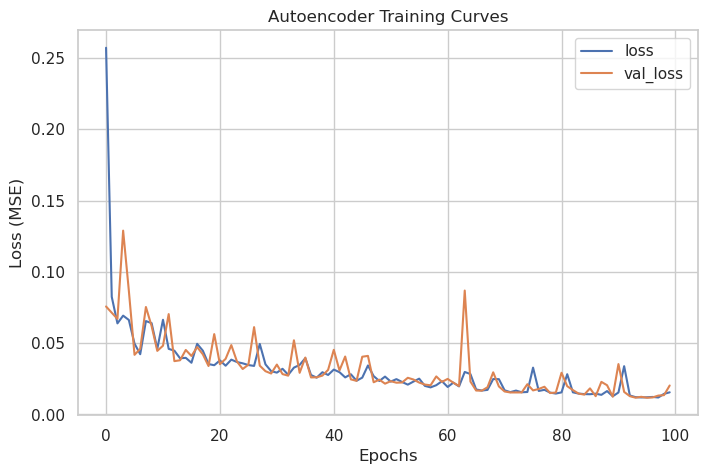

In [90]:
# Plot learning curves for the deep autoencoder
pd.DataFrame(history_ae.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Autoencoder Training Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.show()

In [91]:
#transform in to new low dimension dataset
X_encoded = encoder.predict(X_np)
print(X_np.shape) # training data
print(X_encoded.shape) # encoded data

619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step
(19788, 13)
(19788, 6)


In [92]:
# Use encoded data in Kmeans
k_values_to_try_ae = range(2, 15)
silhouette_scores_kmeans_ae = []
inertia_values_ae = []
training_times_kmeans_ae = []

for k_ae in k_values_to_try_ae:
    print(f"\nRunning K-Means on encoded data with k={k_ae}...")
    kmeans_ae = KMeans(n_clusters=k_ae, init='k-means++', n_init='auto', random_state=42)

    start_time_km_ae = time.time()
    labels_kmeans_ae = kmeans_ae.fit_predict(X_encoded)
    end_time_km_ae = time.time()

    training_time_seconds_km_ae = end_time_km_ae - start_time_km_ae
    training_times_kmeans_ae.append(training_time_seconds_km_ae)

    inertia_ae = kmeans_ae.inertia_
    inertia_values_ae.append(inertia_ae)

    if k_ae > 1 and k_ae < X_encoded.shape[0]:
        score_ae = silhouette_score(X_encoded, labels_kmeans_ae)
        silhouette_scores_kmeans_ae.append(score_ae)
        print(f"  Silhouette Score: {score_ae:.4f}")
    else:
        silhouette_scores_kmeans_ae.append(np.nan)

    print(f"  Inertia (WCSS): {inertia_ae:.2f}")
    print(f"  K-Means Training Time: {training_time_seconds_km_ae:.4f} seconds")
    print(f"  Number of iterations to converge: {kmeans_ae.n_iter_}")


Running K-Means on encoded data with k=2...
  Silhouette Score: 0.3058
  Inertia (WCSS): 62652.82
  K-Means Training Time: 0.2089 seconds
  Number of iterations to converge: 5

Running K-Means on encoded data with k=3...
  Silhouette Score: 0.9045
  Inertia (WCSS): 35179.20
  K-Means Training Time: 0.0197 seconds
  Number of iterations to converge: 4

Running K-Means on encoded data with k=4...
  Silhouette Score: 0.3354
  Inertia (WCSS): 29389.38
  K-Means Training Time: 0.0203 seconds
  Number of iterations to converge: 4

Running K-Means on encoded data with k=5...
  Silhouette Score: 0.4576
  Inertia (WCSS): 22142.66
  K-Means Training Time: 0.0281 seconds
  Number of iterations to converge: 8

Running K-Means on encoded data with k=6...
  Silhouette Score: 0.4685
  Inertia (WCSS): 17850.71
  K-Means Training Time: 0.0333 seconds
  Number of iterations to converge: 8

Running K-Means on encoded data with k=7...
  Silhouette Score: 0.5113
  Inertia (WCSS): 15764.35
  K-Means Traini

In [93]:
best_k_ae = k_values_to_try_ae[np.argmax(silhouette_scores_kmeans_ae)]
best_silhouette_ae = np.nanmax(silhouette_scores_kmeans_ae)

In [94]:
final_kmeans_ae = KMeans(n_clusters=best_k_ae, init='k-means++', n_init='auto', random_state=42)
labels_ae_deep = final_kmeans_ae.fit_predict(X_encoded)

# **Analyzing cluster results**

In [95]:
# Cluster analysis function

def cluster_analysis (
    df_cleaned: pd.DataFrame,
    cluster_input_df: pd.DataFrame,
    cluster_labels: np.ndarray,
    num_cols: list,
    cat_cols: list,
    model_name: str
):
  print(f"Cluster analysis for {model_name}")


  df_segment = df_cleaned.loc[cluster_input_df.index].copy()
  df_segment['Cluster_Label'] = cluster_labels

  # Cluster sizes
  cluster_sizes = df_segment['Cluster_Label'].value_counts().sort_index()
  print("Cluster Sizes:")
  print(cluster_sizes)

  # segments numerical features
  valid_num_features = [col for col in num_cols if col in df_segment.columns]

  cluster_num_segment = df_segment.groupby('Cluster_Label')[valid_num_features].mean()
  print("Cluster segment:")
  print(cluster_num_segment)


# encoded/categorical feature (only weekdays)
  valid_cat_features = [col for col in cat_cols if col in df_segment.columns]

  segment_cat_dist = df_segment.groupby('Cluster_Label')[col].value_counts(normalize=True).mul(100).round(1)
  segment_cat_plot = segment_cat_dist.unstack(fill_value=0)
  print(segment_cat_plot)


### Baseline Kmeans - Cluster label metrics

In [96]:
#Call the function
#Original dataset info:
#df_cleaned = df_model
#num_cols = numerical_features_for_scaling
#cat_cols = categorical_features_to_encode

cluster_analysis(
  df_cleaned= df_model,
  cluster_input_df = X,
  cluster_labels= labels_kmeans_baseline,
  num_cols=numerical_features_for_scaling,
  cat_cols=categorical_features_to_encode,
  model_name="Baseline K-Means")

Cluster analysis for Baseline K-Means
Cluster Sizes:
Cluster_Label
0     2525
1       39
2        7
3      100
4       25
5    15327
6       14
7      193
8      455
9     1103
Name: count, dtype: int64
Cluster segment:
               TotalTransactionValue  TotalItemsInTransaction  \
Cluster_Label                                                   
0                        7623.790036               690.076040   
1                        4122.364359               245.025641   
2                        1028.671429                 1.571429   
3                       16886.459000              1466.660000   
4                      117696.119200             10324.600000   
5                        1623.059749               144.543485   
6                         282.602143                 2.142857   
7                       38279.489430              3403.471503   
8                        6309.947341               512.731868   
9                        1753.844152               157.649139   



### Baseline PCA + Kmeans - Cluster label metrics







In [97]:
cluster_analysis(
  df_cleaned= df_model,
  cluster_input_df = X,
  cluster_labels= labels_kmeans,
  num_cols=numerical_features_for_scaling,
  cat_cols=categorical_features_to_encode,
  model_name="PCA + K-Means (Baseline)")

Cluster analysis for PCA + K-Means (Baseline)
Cluster Sizes:
Cluster_Label
0    19394
1      340
2       54
Name: count, dtype: int64
Cluster segment:
               TotalTransactionValue  TotalItemsInTransaction  \
Cluster_Label                                                   
0                        2508.578722               223.824327   
1                       36182.322941              3193.711765   
2                        3144.016667               177.351852   

               UniqueProductsInTransaction  AvgItemPriceInTransaction  \
Cluster_Label                                                           
0                                23.158142                  12.674858   
1                               195.991176                  12.390682   
2                                20.037037                 168.194725   

               MinItemPriceInTransaction  MaxItemPriceInTransaction  
Cluster_Label                                                        
0                

### Baseline Autoencoder + Kmeans - Cluster label metrics

In [98]:
cluster_analysis(
  df_cleaned= df_model,
  cluster_input_df = X,
  cluster_labels= labels_autoencoder_kmeans ,
  num_cols=numerical_features_for_scaling,
  cat_cols=categorical_features_to_encode,
  model_name="Autoencoder + K-Means (Baseline)")

Cluster analysis for Autoencoder + K-Means (Baseline)
Cluster Sizes:
Cluster_Label
0    16170
1     1277
2     2341
Name: count, dtype: int64
Cluster segment:
               TotalTransactionValue  TotalItemsInTransaction  \
Cluster_Label                                                   
0                        1786.940343               158.713296   
1                        1919.530760               176.486296   
2                       12719.810470              1129.654421   

               UniqueProductsInTransaction  AvgItemPriceInTransaction  \
Cluster_Label                                                           
0                                18.663389                  13.255204   
1                                19.274863                  12.376038   
2                                81.352841                  12.375351   

               MinItemPriceInTransaction  MaxItemPriceInTransaction  
Cluster_Label                                                        
0        

### Finetuned PCA + Kmeans

In [99]:
cluster_analysis(
  df_cleaned= df_model,
  cluster_input_df = X,
  cluster_labels= cluster_labels_pca_ft,
  num_cols=numerical_features_for_scaling,
  cat_cols=categorical_features_to_encode,
  model_name="PCA + K-Means (Finetuned)")

Cluster analysis for PCA + K-Means (Finetuned)
Cluster Sizes:
Cluster_Label
0    19742
1       39
2        7
Name: count, dtype: int64
Cluster segment:
               TotalTransactionValue  TotalItemsInTransaction  \
Cluster_Label                                                   
0                        3087.588366               274.882028   
1                        4122.364359               245.025641   
2                        1028.671429                 1.571429   

               UniqueProductsInTransaction  AvgItemPriceInTransaction  \
Cluster_Label                                                           
0                                26.125722                  12.740111   
1                                27.333333                  77.051414   
2                                 1.142857                 655.897143   

               MinItemPriceInTransaction  MaxItemPriceInTransaction  
Cluster_Label                                                        
0               

### Finetuned Autoencoder + Kmeans





In [100]:
cluster_analysis(
  df_cleaned= df_model,
  cluster_input_df = X,
  cluster_labels= labels_ae_shallow,
  num_cols=numerical_features_for_scaling,
  cat_cols=categorical_features_to_encode,
  model_name="Autoencoder + K-Means (Finetuned)")

Cluster analysis for Autoencoder + K-Means (Finetuned)
Cluster Sizes:
Cluster_Label
0       338
1      1164
2        39
3      1379
4         7
5      1042
6      1220
7       903
8      1257
9      1349
10      163
11      101
12    10805
13       21
Name: count, dtype: int64
Cluster segment:
               TotalTransactionValue  TotalItemsInTransaction  \
Cluster_Label                                                   
0                        7224.208846               574.795858   
1                        2530.036598               228.533505   
2                        4122.364359               245.025641   
3                        2587.726838               233.889775   
4                        1028.671429                 1.571429   
5                        2664.659904               229.481766   
6                        2555.846393               231.818852   
7                        2568.444097               231.259136   
8                        2498.382753               222.

Deep Autoencoder + Kmeans


In [101]:
cluster_analysis(
  df_cleaned= df_model,
  cluster_input_df = X,
  cluster_labels= labels_ae_deep,
  num_cols=numerical_features_for_scaling,
  cat_cols=categorical_features_to_encode,
  model_name="Deep Autoencoder + Kmeans")

Cluster analysis for Deep Autoencoder + Kmeans
Cluster Sizes:
Cluster_Label
0    19734
1       47
2        7
Name: count, dtype: int64
Cluster segment:
               TotalTransactionValue  TotalItemsInTransaction  \
Cluster_Label                                                   
0                        3088.748634               274.992956   
1                        3459.068085               203.531915   
2                        1028.671429                 1.571429   

               UniqueProductsInTransaction  AvgItemPriceInTransaction  \
Cluster_Label                                                           
0                                26.135908                  12.669962   
1                                22.851064                  95.558195   
2                                 1.142857                 655.897143   

               MinItemPriceInTransaction  MaxItemPriceInTransaction  
Cluster_Label                                                        
0               